In [1]:
import read_data
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy import unique
from sklearn.mixture import GaussianMixture

In [2]:
dataframe = read_data.create_frame()
dataframe

,object_name,seq_name,num_of_sequences,sequence_len,cycle,sequence_values,scenes
0,BRUMC1,BRUMC1,1,8,,"[B.27.23.B.30, A.38, G.27.30, B.24.11, B.27.28...",[1]
1,BRUMC2,BRUMC2,1,2,a,"[E.17.48.3, B.29.23.B.25]",[14]
2,BRUMC3,BRUMC3,1,2,a,"[B.29.35, B.24.5]",[13]
3,BRUMC4,BRUMC4,1,2,a,"[B.24.11, B.29.35]",[14]
4,COLA02,COLA02,1,8,,"[B.24.11, B.31.28, A.6, B.24.28.7, A.38, B.29....","[1, 5]"
...,...,...,...,...,...,...,...
250,MUNSA-0007688,MUNSA-0007688,1,8,0,"[B.24.10, B.27.25.B.30, A.36, B.24.28, B.24.11...",[9]
251,MUNSA-0007686,MUNSA-0007686,1,10,0,"[A.37, B.29.25, A.37, B.29.25, A.37, B.29.25, ...",[0]
252,HMV-63.54.12,HMV-63.54.12inf,2,16,0,"[E.31.47, B.29.25, A.19, B.31.25, E.31.47, B.2...",[0]
253,HMV-63.54.12,HMV-63.54.12cent,2,16,0,"[B.29.25, A.19, B.31.25, A.17, B.29.25, A.19, ...",[0]


In [3]:
sequences = dataframe['sequence_values']
names = dataframe['seq_name']
list_s = sequences.tolist()
sentences = [' '.join(string_list) for string_list in list_s]
print(sentences)
print(type(sentences))
print(type(sentences[0]))

['B.27.23.B.30 A.38 G.27.30 B.24.11 B.27.28.30.B.30 A.4 H.24.28 B.24.12', 'E.17.48.3 B.29.23.B.25', 'B.29.35 B.24.5', 'B.24.11 B.29.35', 'B.24.11 B.31.28 A.6 B.24.28.7 A.38 B.29.30.10 E.31.20 B.27.30', 'B.24.28.30 C.24.1 G.29.30.52 A.36 B.27.23 B.24.11 B.29.23 E.17', 'A.1.16 C.29 A.36 B.24.28 A.6 G.29.52 B.24.11 B.27.30 A.38 B.29.23', 'A.1.16 C.29 A.36 B.24.28 A.6 G.29.52 B.24.11 B.27.30 A.38 B.29.23.B.30', 'B.29.25 B.24.25', 'B.31.21 B.27.30 B.31.21 B.27.30', 'B.24.11 A.36 B.24.11 A.36', 'B.24.28.10 E.17.3 B.29.34', 'E.17.48 B.29.23', 'E.17.3 B.29.35', 'B.24.11 B.29.23.B.25', 'B.29.25 E.17.3', 'A.1 B.24.11 B.27.30 B.29.30 B.24.10.7 A.36 A.6 H.24.28', 'E.17.48.3 B.29.25', 'B.29.25 E.17', 'A.17.3 B.29.25', 'B.29.25 E.17.48.3', 'B.29.25 E.17.3', 'B.24.25.B.11 B.29.23.B.25', 'E.17.48.3 B.29.23.B.25', 'A.36.3 B.29.25', 'B.29.35.B.25 E.17', 'E.17.3 B.29.23.25.B.25', 'E.17 B.29.23.B.25', 'E.17.48.3 B.29.23.B.25', 'B.29.23.B.25 E.17', 'E.17.3 B.29.23.B.25', 'E.17.3 B.29.23.B.25', 'E.17.3 B.29

In [4]:
def custom_tokenizer(text):
    return text.split()

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)
X = vectorizer.fit_transform(sentences)
print(X[1])
feature_names = vectorizer.get_feature_names_out()

print("Counts features in vectorizer:", len(feature_names))
print(type(X))
print(type(X[0]))
print(X[0])
sentence_vectors = X.toarray()

  (0, 90)	0.5414024512506003
  (0, 143)	0.8407635730571595
Counts features in vectorizer: 170
<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>
  (0, 51)	0.35622765289267644
  (0, 160)	0.3090880851097673
  (0, 39)	0.3260999722721223
  (0, 77)	0.47945667059234665
  (0, 48)	0.17520381836696658
  (0, 152)	0.44623692598960807
  (0, 37)	0.21907881201283566
  (0, 75)	0.40438499738046635


/home/zuzaw/mini_hackathon/Bootcamp-mini-hackathon-2024/.venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [5]:
n_clusters = 4
gaussian_model = GaussianMixture(n_components=n_clusters)

gaussian_model.fit(sentence_vectors)

gaussian_result = gaussian_model.predict(sentence_vectors)

gaussian_clusters = unique(gaussian_result)

print(len(gaussian_result))
print(gaussian_clusters)
print(gaussian_result)

255
[0 1 2 3]
[2 3 2 2 1 0 1 1 2 1 1 2 2 2 3 2 1 2 2 2 2 2 3 3 2 2 2 3 3 3 3 3 3 3 2 2 3
 2 2 2 2 0 3 1 1 0 1 1 0 0 2 0 0 1 1 2 1 2 1 2 0 2 1 0 1 1 1 1 1 1 1 1 2 1
 1 2 1 3 1 2 3 2 2 2 2 2 0 2 2 2 2 2 2 2 1 2 2 2 3 2 2 3 3 2 3 2 2 0 3 3 2
 3 2 2 2 2 3 2 2 3 2 3 3 3 2 2 0 2 2 2 2 0 3 3 1 1 3 2 2 3 2 2 3 0 0 2 0 2
 2 0 2 2 2 2 2 1 2 2 0 1 2 1 1 1 2 0 2 2 1 1 2 2 3 2 3 1 0 1 0 2 2 1 2 3 1
 0 1 0 2 2 1 1 0 0 1 1 1 1 1 1 2 2 0 0 0 0 1 1 1 1 2 2 0 0 1 1 0 0 0 0 2 2
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 0 2 2 2 0]


Obserwacje z clusteringu
W klustrze 0 - każda sekwencja zawiera znak 'B.29.23.B.25' mają 2 znaki
w klustrze 1
W klustrze 2 - często pojawiają się 'B.29.X' {35, 25, 34, 23, 23.25.B.25, 115} cztery razy 'B.24.11' dwa razy B.31.28.30'
w klustrze 3 - 'A.X' {6, 36, 38}

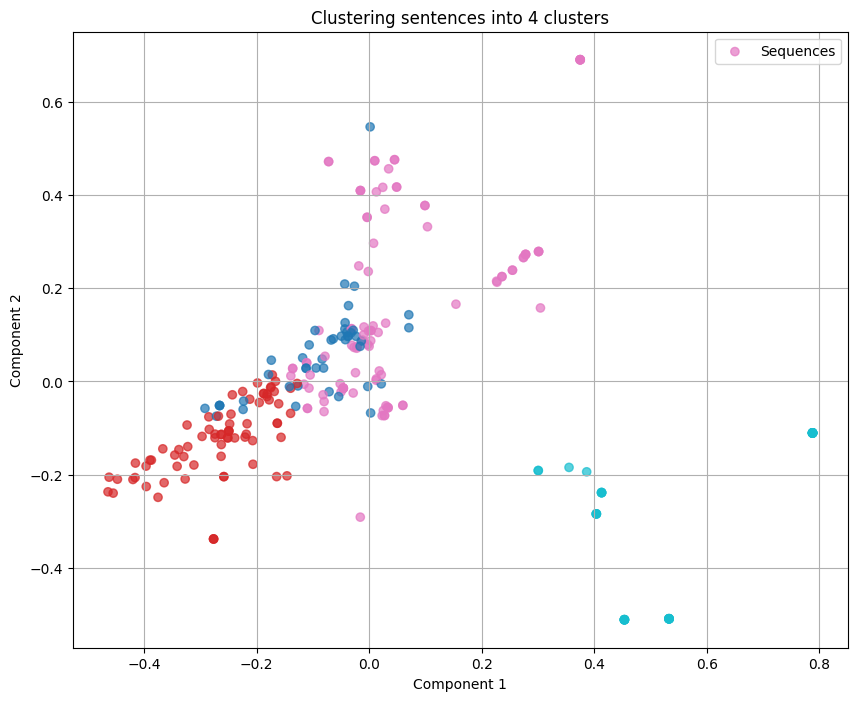

In [6]:

pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(sentence_vectors)

colors = np.arange(n_clusters) % 10

plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=gaussian_result, cmap='tab10', alpha=0.7, label='Sequences')
plt.legend()

plt.title(f'Clustering sentences into {n_clusters} clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.savefig('name.png')
plt.show()


In [7]:
vectors_by_clusters = [[] for _ in range(n_clusters)]
names_by_clusters = [[] for _ in range(n_clusters)]
seq_values_by_clusters = [[] for _ in range(n_clusters)]

for i in range(len(sentence_vectors)):
    cluster_id = gaussian_result[i]
    print(f'{cluster_id} {names[i]}')
    vectors_by_clusters[cluster_id].append(sentence_vectors[i])
    names_by_clusters[cluster_id].append(names[i])
    seq_values_by_clusters[cluster_id].append(sequences[i])

count_sign_by_clusters = []
for num in range(n_clusters):
    count_sign_by_clusters.append({})
    for sentence in seq_values_by_clusters[num]:
        for sign in sentence:
            if sign in count_sign_by_clusters[num]:
                count_sign_by_clusters[num][sign]+=1
            else:
                count_sign_by_clusters[num][sign] = 1

sorted_dicts = []
for num in range(n_clusters):
    print(f"Kluster {num} posiada aż {len(vectors_by_clusters[num])} sekwencji")
    sorted_dict = dict(sorted(count_sign_by_clusters[num].items(), key=lambda item: item[1], reverse=True))
    sorted_dicts.append(sorted_dict)
    print(sorted_dict)


2 BRUMC1
3 BRUMC2
2 BRUMC3
2 BRUMC4
1 COLA02
0 COLA03
1 COLA06
1 COLA07
2 COLA15
1 COLA29
1 COLA30
2 COLA43
2 COLA44
2 COLA45
3 COLA46
2 COLA47
1 COLA50
2 COLA54
2 COLA56
2 COLA57
2 COLA59
2 COLA61
3 COLA62
3 COLA63
2 COLA65
2 EMB-VA11809
2 EMB-VA11810
3 EMB-VA11811
3 EMB-VA12368
3 EMB-VA12369
3 EMB-VA12370
3 EMB-VA12430
3 EMB-VA12462
3 EMB-VA12463
2 EMB-VA12490
2 EMB-VA12593
3 EMB-VA12606
2 EMB-VA12607
2 EMB-VA12712
2 EMB-VA12713
2 EMB-VA12720
0 EMB-VA12721
3 EMB-VA12724
1 EMB-VA12736
1 EMB-VA28404
0 EMB-VA44371
1 EMB-VA8916
1 HMV-63.54.15
0 HMV-63.54.6
0 HMV-63.54.9
2 HMV-63.54.4
0 HMV-63.54.7
0 LAY1
1 MA7525
1 MA7540
2 MA7547
1 MA754X
2 MA7550
1 MA7554
2 MA7566
0 MAL0341(2.3.595)
2 MAL23.030.10
1 MIMAC139
0 MIMO-MAC164
1 MIMOMA256
1 MIMOMA257
1 MIMOMA258
1 MIMOMA259
1 MIMOMA263
1 MIMOMA265
1 MIMOMA277
1 MIMOMA284
2 MIMoMA297
1 MIMOMA303
1 MIMOMA518
2 MIMOMAC125
1 MIMOMAC165
3 MKSL364
1 MKSL400
2 ML-400676
3 ML400678
2 MLP-1451
2 MLP-4275
2 MLP-4276
2 MLP1446
2 MLP1447
0 MLP1448
2 MM


W klustrze 1 - znak 'B.29.23.B.25' występuję 35 razy a znaki zaczynającę się od E.17 25 czyli w każdej występuje ten sam znak i nie występuje w żadnym innym


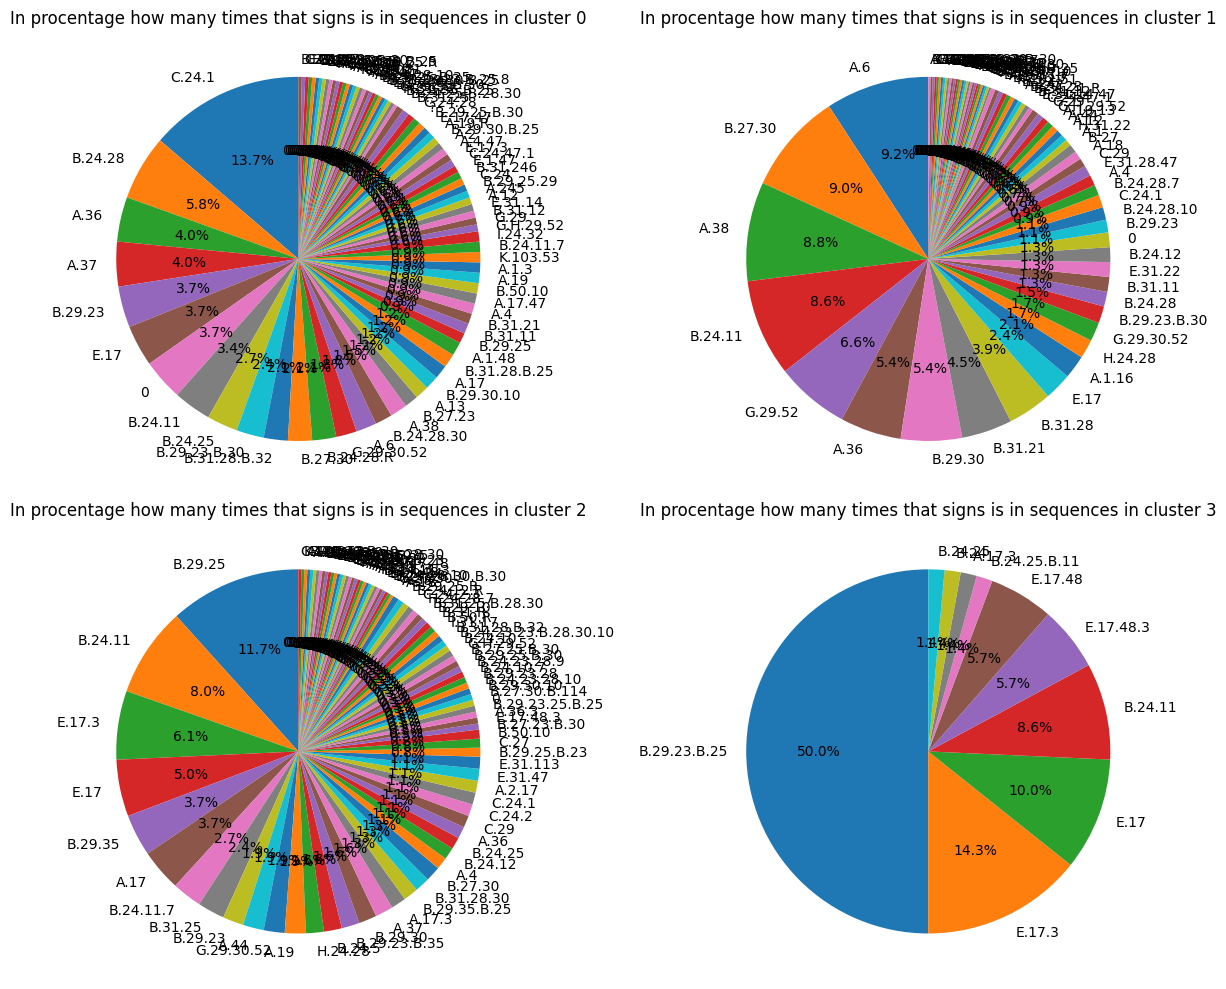

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].pie(sorted_dicts[0].values(), labels=sorted_dicts[0].keys(), autopct='%1.1f%%', startangle=90)
axs[0, 0].set_title('In procentage how many times that signs is in sequences in cluster 0')

axs[0, 1].pie(sorted_dicts[1].values(), labels=sorted_dicts[1].keys(), autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title('In procentage how many times that signs is in sequences in cluster 1')

axs[1, 0].pie(sorted_dicts[2].values(), labels=sorted_dicts[2].keys(), autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title('In procentage how many times that signs is in sequences in cluster 2')

axs[1, 1].pie(sorted_dicts[3].values(), labels=sorted_dicts[3].keys(), autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('In procentage how many times that signs is in sequences in cluster 3')

plt.tight_layout()
plt.show()


In [9]:
# Interesting thing in cluster 1 every scene, but one is acyclic
print(names_by_clusters[1])

df = dataframe[['seq_name', 'cycle']]
cycle_dict = df.set_index('seq_name').to_dict(orient='index')

print(cycle_dict)

for name in names_by_clusters[1]:
    print(cycle_dict[name])

['COLA02', 'COLA06', 'COLA07', 'COLA29', 'COLA30', 'COLA50', 'EMB-VA12736', 'EMB-VA28404', 'EMB-VA8916', 'HMV-63.54.15', 'MA7525', 'MA7540', 'MA754X', 'MA7554', 'MIMAC139', 'MIMOMA256', 'MIMOMA257', 'MIMOMA258', 'MIMOMA259', 'MIMOMA263', 'MIMOMA265', 'MIMOMA277', 'MIMOMA284', 'MIMOMA303', 'MIMOMA518', 'MIMOMAC165', 'MKSL400', 'MNAAH-Mo10400', 'MUNSA-0006691', 'MUNSA-0006692', 'MUS1', 'MUS14', 'MUS16', 'MUS17', 'MUS18', 'MUS4', 'MUS5', 'NM-D6037', 'NM278', 'NMAI-8169-IZ', 'NMAI-XXX', 'PENN-43-24-1', 'VKGM45.16.1', 'WIENMV-174.317', 'COLA60inf', 'COLA60sup', 'EMB-VA8918inf', 'EMB-VA8918sup', 'MA7511inf', 'MA7511sup', 'MIMOMA522inf', 'MIMOMA522sup', 'MIMOMAC128inf', 'MIMOMAC128sup', 'MNAAH-Mo0075inf', 'MNAAH-Mo0075sup', 'MTMNA-1729-673inf', 'MTMNA-1729-673sup', 'MUNSA-CS71inf', 'MUNSA-CS71sup', 'MUNSA-CS98inf', 'MUNSA-CS98sup', 'MUS11inf', 'MUS11sup', 'MUS3inf', 'MUS3sup', 'MIMOMAC54inf', 'MIMOMAC54sup', 'MTMNA984-CFD-15776inf', 'MTMNA984-CFD-15776cent', 'MTMNA984-CFD-15776sup', 'MUS2cent

In [18]:
print(names_by_clusters[3])

df = dataframe[['seq_name', 'scenes']]

scenes_dict = df.set_index('seq_name').to_dict(orient='index')

scenes_in_one = []
for name in names_by_clusters[1]:
    values = scenes_dict[name]["scenes"]
    for val in values:
        scenes_in_one.append(val)

print(scenes_dict)
print(scenes_in_one)
counted = dict(Counter(scenes_in_one))

sorted_keys = sorted(counted.keys())

sorted_dict = {key: counted[key] for key in sorted_keys}
print(sorted_dict)

['BRUMC2', 'COLA46', 'COLA62', 'COLA63', 'EMB-VA11811', 'EMB-VA12368', 'EMB-VA12369', 'EMB-VA12370', 'EMB-VA12430', 'EMB-VA12462', 'EMB-VA12463', 'EMB-VA12606', 'EMB-VA12724', 'MKSL364', 'ML400678', 'MPR965', 'MTMNA-1001-CFD15784', 'MTMNA-1002-CFD-15775', 'MTMNA-16?0-624', 'MTMNA-1635-579', 'MTMNA-1637-581', 'MTMNA-1640-584', 'MTMNA-1687-631', 'MTMNA-1706-650', 'MTMNA-1712-656', 'MTMNA-1721-665', 'MTMNA-1729-668', 'MTTiaMNA1703647', 'MTTiaMNA1742685', 'MUNSA-0051135', 'MUNSA-114', 'MUNSA-CS03', 'MUS8', 'NM-35-14-1', 'NMAI-97658']
{'BRUMC1': {'scenes': ['1']}, 'BRUMC2': {'scenes': ['14']}, 'BRUMC3': {'scenes': ['13']}, 'BRUMC4': {'scenes': ['14']}, 'COLA02': {'scenes': ['1', '5']}, 'COLA03': {'scenes': ['9']}, 'COLA06': {'scenes': ['4']}, 'COLA07': {'scenes': ['4']}, 'COLA15': {'scenes': ['4']}, 'COLA29': {'scenes': ['0']}, 'COLA30': {'scenes': ['0']}, 'COLA43': {'scenes': ['12']}, 'COLA44': {'scenes': ['14']}, 'COLA45': {'scenes': ['13']}, 'COLA46': {'scenes': ['12']}, 'COLA47': {'scen